# Twitter Sentiment Analysis in R

**Intuition:** Using the 'twitteR' package, we will gather aroung 50 Tweets based on a trending topic and then we will analyze the sentiment of these Tweets with the 'tidytext' package. Finally, we will plot our overall result on a bar chart.

### Importing the packages

In [12]:
options(warn = -1)
library(twitteR)
library(plyr)
library(dplyr)
library(tidytext)
library(ggplot2)

### Authorizing the Twitter API

In [3]:
consumer_key = 'xxxxxxxxxxxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxx-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
setup_twitter_oauth(consumer_key, consumer_secret,
                    access_token, access_secret)

[1] "Using direct authentication"


Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp


*The Keys & Tokens has been removed to avoid misuse.*

### Getting the Tweets

In [4]:
search.string <- "#nrc"
no.of.tweets <- 50
tweets <- searchTwitter(search.string, n = no.of.tweets, lang = "en")
tweets <- twListToDF(tweets)
head(tweets, 10)

text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
@tavleen_singh You do NOT Worry. #NRC will SAVE the very Fabric of BHARAT.,FALSE,0,tavleen_singh,2019-12-16 14:58:00,FALSE,1206386143664566272,1206589295856934913,118757160,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",ShahDeepanV,0,FALSE,FALSE,NA,NA
"RT @FriedrichPieter: Arundhati Roy's statement on #CABBill2019. It ""eerily resembles the 1935 Nuremberg Laws of the Third Reich."" Complianc…",FALSE,0,NA,2019-12-16 14:57:37,FALSE,NA,1206589202655264769,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",VazeIndian,172,TRUE,FALSE,NA,NA
RT @Ahmedshabbir20: Massive rally against #CAB &amp; #NRC by #MamataBanerjee. Mamata leadeong the rally &amp; huge crowd following her.,FALSE,0,NA,2019-12-16 14:57:29,FALSE,NA,1206589165963374592,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",d_oncorleone,206,TRUE,FALSE,NA,NA
RT @abhijitmajumder: Here’s some news for those who said #CAA and #NRC would change nothing. This report says there’s a huge rush of panick…,FALSE,0,NA,2019-12-16 14:57:23,FALSE,NA,1206589144069095430,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",gunaranjanch,729,TRUE,FALSE,NA,NA
RT @kamaalrkhan: If this is the public reaction for #CABBill2019 #NRC then it can lead to civil war in the country. Therefore govt must ret…,FALSE,0,NA,2019-12-16 14:57:20,FALSE,NA,1206589128185237504,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",MdAatifHasan,138,TRUE,FALSE,NA,NA
"Today's protests in Kolkata, Mamta Banerjee leading right in the front #CAB #NRC https://t.co/SA3xfFlbyF",FALSE,0,NA,2019-12-16 14:57:15,FALSE,NA,1206589109818527745,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Isaaq44897387,0,FALSE,FALSE,NA,NA
"RT @chaiandwai: The #MumbaiUniversity protest against the #PoliceBrutalityinJamia , #CitizenshipAmendmentAct and #NRC concluded with everyo…",FALSE,0,NA,2019-12-16 14:57:08,FALSE,NA,1206589078260502529,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",avatarinfinite,11,TRUE,FALSE,NA,NA
"RT @bharatsharma_: Those who hero-worship Aurangzeb, Babur, #ISIS and Osama Bin Laden, how can they deem #CAB and #NRC correct. It makes th…",FALSE,0,NA,2019-12-16 14:56:47,FALSE,NA,1206588991652286466,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Tapasyasin,10,TRUE,FALSE,NA,NA
"RT @mayukhrghosh: #CABProtests #NRC ""Over My Dead Body"" @MamataOfficial marches forward with people from all RELIGION. This is my City.…",FALSE,0,NA,2019-12-16 14:56:37,FALSE,NA,1206588947691790336,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",sayaksayaksen3,217,TRUE,FALSE,NA,NA
"RT @Waseem_Ahmed11: I FUCKING LOVE KERALA MAN. WHAT A STATE! All the political parties, religious leaders of different faiths came together…",FALSE,0,NA,2019-12-16 14:56:28,FALSE,NA,1206588912375721985,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",BharatRajagopal,7,TRUE,FALSE,NA,NA


### Creating a dataframe with the Tweets & Tweet IDs

In [5]:
tw_df <- data_frame(tweet_id = tweets$id, tweet = tweets$text)
head(tw_df, 5)

tweet_id,tweet
1206589295856934913,@tavleen_singh You do NOT Worry. #NRC will SAVE the very Fabric of BHARAT.
1206589202655264769,"RT @FriedrichPieter: Arundhati Roy's statement on #CABBill2019. It ""eerily resembles the 1935 Nuremberg Laws of the Third Reich."" Complianc…"
1206589165963374592,RT @Ahmedshabbir20: Massive rally against #CAB &amp; #NRC by #MamataBanerjee. Mamata leadeong the rally &amp; huge crowd following her.
1206589144069095430,RT @abhijitmajumder: Here’s some news for those who said #CAA and #NRC would change nothing. This report says there’s a huge rush of panick…
1206589128185237504,RT @kamaalrkhan: If this is the public reaction for #CABBill2019 #NRC then it can lead to civil war in the country. Therefore govt must ret…


### Splitting the 'tweet' column into tokens

In [6]:
tw_df <- tw_df %>%
  unnest_tokens(word, tweet)

### Removing the Stop-Words

In [7]:
data(stop_words)
head(stop_words)
tw_df <- tw_df %>% anti_join(stop_words)

word,lexicon
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART


Joining, by = "word"


### Categorization of words into positive and negative categories by the lexicon (dictionary)

In [8]:
bing <- get_sentiments("bing")

### Joining the sentiment data

In [9]:
tw_df %>% inner_join(bing)

Joining, by = "word"


tweet_id,word,sentiment
1206589295856934913,worry,negative
1206589144069095430,panick,negative
1206589128185237504,lead,positive
1206589109818527745,protests,negative
1206589109818527745,leading,positive
1206589078260502529,protest,negative
1206588991652286466,hero,positive
1206588991652286466,correct,positive
1206588947691790336,dead,negative
1206588912375721985,fucking,negative


### Grouping the sentiment data

In [10]:
tw_df %>% inner_join(bing) %>% count(tweet_id, sentiment)

Joining, by = "word"


tweet_id,sentiment,n
1206587838138998784,negative,1
1206587882313437184,negative,1
1206587882313437184,positive,1
1206587967373885441,negative,1
1206588019345481728,negative,1
1206588030166822912,negative,2
1206588100639481862,negative,1
1206588148756701185,negative,1
1206588181136596994,negative,1
1206588187818151937,negative,2


### Plotting the sentiment data

Joining, by = "word"


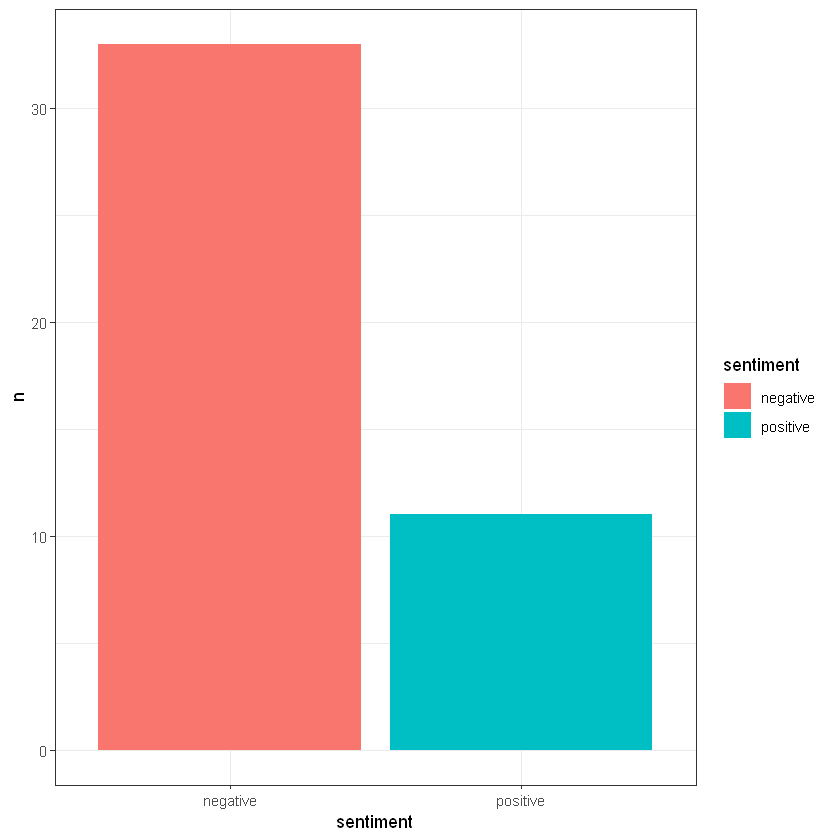

In [11]:
tw_df %>% 
  inner_join(bing) %>% 
  count(sentiment) %>%
  ggplot(aes(sentiment, n, fill = sentiment))+
  geom_col()+
  theme_bw()